In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
warnings.simplefilter("ignore")

In [3]:
np.random.seed(1)

In [4]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform

Using TensorFlow backend.


In [5]:
train1 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-1.train",
                         delimiter=' ', usecols=range(1, 8))
test1 = loadtxt("/home/umair/Desktop/Data Science and BI/machine learning/Monk/monks-1.test',
                        delimiter=' ', usecols=range(1, 8))



In [6]:
X_train1=train1[:, 1:7]
y_train1=train1[:, 0]

X_test1=test1[:, 1:7]
y_test1=test1[:, 0]

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc=OneHotEncoder()

In [9]:
X_train1=enc.fit_transform(X_train1).toarray()

X_test1=enc.fit_transform(X_test1).toarray()

In [10]:
def create_modelCV(lr=0.1, mom=0.1, act='relu'):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, 
                    kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1), 
                    activation=act,
                    kernel_regularizer=l2(0.0001)
                   ))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer= SGD(lr=lr, momentum=mom, nesterov=False))
    return model

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


hyper_params_space = {
        'lr': [0.1, 0.2, 0.25, 0.3, 0.4, 0.5],
        'mom': [0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.9],
        'act': ['sigmoid', 'relu']
    },



print('===================================')
model = KerasClassifier(build_fn=create_modelCV, batch_size=25, epochs=150)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring=['accuracy'], refit='accuracy', cv=3, n_jobs=2)
mlpr.fit(X_train1, y_train1)
print("DONE")
resultGSCV=pd.DataFrame(mlpr.cv_results_)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
124/124 [==============================] - 0s 882us/step - loss: 0.2479 - accuracy: 0.5726
Epoch 2/150
124/124 [==============================] - 0s 120us/step - loss: 0.2358 - accuracy: 0.6210
Epoch 3/150
124/124 [==============================] - 0s 113us/step - loss: 0.2215 - accuracy: 0.6290
Epoch 4/150
124/124 [==============================] - 0s 137us/step - loss: 0.2008 - accuracy: 0.8145
Epoch 5/150
124/124 [==============================] - 0s 168us/step - loss: 0.1854 - accuracy: 0.8306
Epoch 6/150
124/124 [==============================] - 0s 186us/step - loss: 0.1716 - accuracy: 0.8629
Epoch 7/150
124/124 [==============================] - 0s 179us/step - loss: 0.1593 - accuracy: 0.8468
Epoch 8/150
124/124 [==============================] - 0s 232us/step - loss: 0.1537 - accuracy: 0.8468
Epoch 9/150
124/124 [==============================] - 0

In [12]:
mlpr.best_params_

{'act': 'relu', 'lr': 0.4, 'mom': 0.5}

In [13]:
from keras import initializers

In [14]:
def create_modelOP():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, activation=mlpr.best_params_['act'], kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1)
                    , kernel_regularizer=l2(0.0001)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], 
                  optimizer= SGD(lr=mlpr.best_params_['lr'], momentum=mlpr.best_params_['mom']))
    return model

In [15]:
#instantiate the model and run it
#es = EarlyStopping(monitor='val_loss', patience=30)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model1 = create_modelOP()

history1 = model1.fit(X_train1, y_train1, 
                      validation_data=(X_test1, y_test1), 
                      epochs=150, 
                      batch_size=25, 
                      #callbacks=[es,mc]
                     ).history

Train on 124 samples, validate on 432 samples
Epoch 1/150
124/124 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.4516 - val_loss: 0.2465 - val_accuracy: 0.5741
Epoch 2/150
124/124 [==============================] - 0s 296us/step - loss: 0.2422 - accuracy: 0.5726 - val_loss: 0.2422 - val_accuracy: 0.5718
Epoch 3/150
124/124 [==============================] - 0s 327us/step - loss: 0.2307 - accuracy: 0.6613 - val_loss: 0.2372 - val_accuracy: 0.6273
Epoch 4/150
124/124 [==============================] - 0s 307us/step - loss: 0.2223 - accuracy: 0.6855 - val_loss: 0.2323 - val_accuracy: 0.6505
Epoch 5/150
124/124 [==============================] - 0s 308us/step - loss: 0.2124 - accuracy: 0.7581 - val_loss: 0.2262 - val_accuracy: 0.6782
Epoch 6/150
124/124 [==============================] - 0s 310us/step - loss: 0.2020 - accuracy: 0.7419 - val_loss: 0.2220 - val_accuracy: 0.6898
Epoch 7/150
124/124 [==============================] - 0s 306us/step - loss: 0.1932 - 

Epoch 57/150
124/124 [==============================] - 0s 318us/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 58/150
124/124 [==============================] - 0s 202us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 59/150
124/124 [==============================] - 0s 221us/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 60/150
124/124 [==============================] - 0s 308us/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 61/150
124/124 [==============================] - 0s 377us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 62/150
124/124 [==============================] - 0s 405us/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 63/150
124/124 [==============================] - 0s 364us/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0180 -

124/124 [==============================] - 0s 530us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 114/150
124/124 [==============================] - 0s 607us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 115/150
124/124 [==============================] - 0s 178us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 116/150
124/124 [==============================] - 0s 214us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 117/150
124/124 [==============================] - 0s 188us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 118/150
124/124 [==============================] - 0s 399us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 119/150
124/124 [==============================] - 0s 301us/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0074 - val_ac

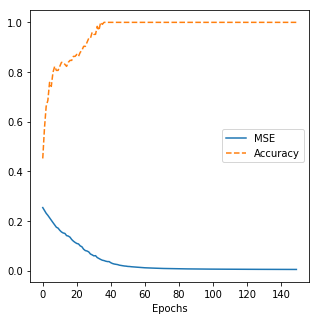

In [33]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['loss'], label='MSE')
plt.plot(history1['accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for training', fontsize = 18)
plt.xlabel('Epochs')
#plt.ylabel('MSE')
plt.legend()
plt.show()

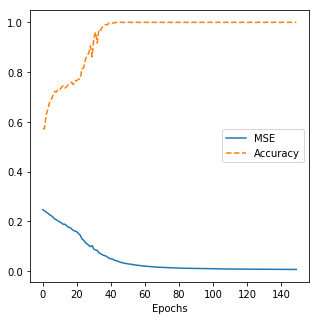

In [34]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['val_loss'], label='MSE')
plt.plot(history1['val_accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for test', fontsize = 18)
plt.xlabel('Epochs')
#plt.ylabel('MSE')
plt.legend()
plt.show()

In [26]:
mse, accuracy = model1.evaluate(X_test1, y_test1)

432/432 [==============================] - 0s 35us/step


In [27]:
print("Accuracy on Test", accuracy)
print("MSE on Test", mse)

Accuracy on Test 1.0
MSE on Test 0.006170506140700093


In [28]:
mse_tr, accuracy_tr = model1.evaluate(X_train1, y_train1)

124/124 [==============================] - 0s 82us/step


In [30]:
print("Accuracy on Training", accuracy_tr)
print("MSE on Training", mse_tr)

Accuracy on Training 1.0
MSE on Training 0.004349993121239447
